• In order to assess the effect of the two transformations on the heteroscedascity of the data,perform a 12-month moving standard deviation using the runSD function from the package TTR on the raw data, square-root-transformed and log-transformed data.

• Plot these three moving standard deviations.

• Which transformation makes the data the most homoscedastic (constant variance through
time)?

3-1  12-month moving standard deviation using the runSD function from the package TTR on the raw data, square-root-transformed and log-transformed data.

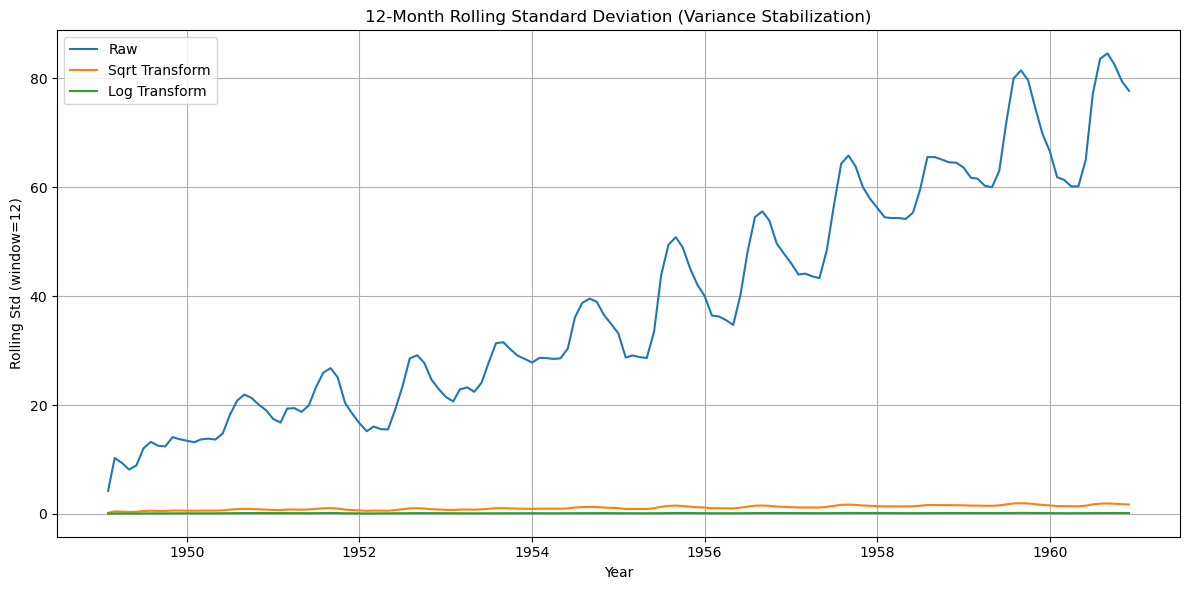

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data 
df = pd.read_csv("AirPassengers.csv")

# 小数年份转 datetime
def year_fraction_to_datetime(year_float):
    year = int(year_float)
    fraction = year_float - year
    month = int(round(fraction * 12)) + 1
    if month > 12:
        year += 1
        month = 12
    return pd.Timestamp(year=year, month=month, day=1)

df["Date"] = df["Time"].apply(year_fraction_to_datetime)
ts = df.set_index("Date")["AirPassengers"].asfreq("MS")

# ==== 三种数据 ====
ts_raw  = ts
ts_sqrt = np.sqrt(ts)
ts_log  = np.log(ts)

# ==== 12个月滚动标准差 ====
roll_raw  = ts_raw.rolling(window=12, min_periods=1).std()
roll_sqrt = ts_sqrt.rolling(window=12, min_periods=1).std()
roll_log  = ts_log.rolling(window=12, min_periods=1).std()

# ==== 画图比较 ====
plt.figure(figsize=(12,6))
plt.plot(roll_raw.index, roll_raw, label="Raw")
plt.plot(roll_sqrt.index, roll_sqrt, label="Sqrt Transform")
plt.plot(roll_log.index, roll_log, label="Log Transform")
plt.title("12-Month Rolling Standard Deviation (Variance Stabilization)")
plt.xlabel("Year")
plt.ylabel("Rolling Std (window=12)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
